<a href="https://colab.research.google.com/github/sashwot10/5CS037/blob/main/worksheet7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [27]:

import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Data/housing.csv")
df.columns = df.columns.str.strip()

# Fill missing values in numeric columns (only total_bedrooms in this case)
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())
# Strip whitespace
df.columns = df.columns.str.strip()

# Drop target and categorical column
X = df.drop(["median_house_value", "ocean_proximity"], axis=1)  # keep only numeric
y = df["median_house_value"]

# Convert to numpy arrays
X = X.values
y = y.values

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Features shape:", X_train.shape)

Features shape: (16512, 8)


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

train_pred = linear_model.predict(X_train)
test_pred = linear_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 4811134397.884198
Test MSE: 5059928371.165359


In [30]:
# Drop target and categorical column
X = df.drop(["median_house_value", "ocean_proximity"], axis=1).values
y = df["median_house_value"].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [32]:
ridge = Ridge()
ridge_params = {"alpha": [0.01, 0.1, 1, 10, 100]}

ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring="neg_mean_squared_error")
ridge_grid.fit(X_train, y_train)

best_ridge = ridge_grid.best_estimator_

ridge_train_mse = mean_squared_error(y_train, best_ridge.predict(X_train))
ridge_test_mse = mean_squared_error(y_test, best_ridge.predict(X_test))

print("Ridge Regression")
print("Best alpha:", ridge_grid.best_params_)
print("Train MSE:", ridge_train_mse)
print("Test MSE:", ridge_test_mse)

Ridge Regression
Best alpha: {'alpha': 10}
Train MSE: 4811139082.00071
Test MSE: 5059651137.843452


In [34]:
lasso = Lasso(max_iter=10000)
lasso_params = {"alpha": [0.001, 0.01, 0.1, 1, 10]}

lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring="neg_mean_squared_error")
lasso_grid.fit(X_train, y_train)

best_lasso = lasso_grid.best_estimator_

lasso_train_mse = mean_squared_error(y_train, best_lasso.predict(X_train))
lasso_test_mse = mean_squared_error(y_test, best_lasso.predict(X_test))

print("Lasso Regression")
print("Best alpha:", lasso_grid.best_params_)
print("Train MSE:", lasso_train_mse)
print("Test MSE:", lasso_test_mse)

Lasso Regression
Best alpha: {'alpha': 10}
Train MSE: 4811135093.259237
Test MSE: 5059810527.25249


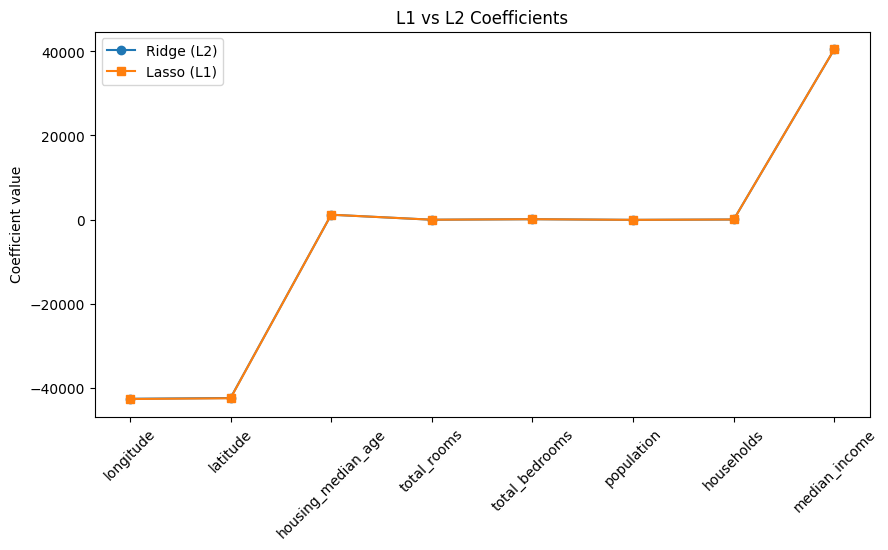

Number of zero coefficients (Lasso): 0
Number of zero coefficients (Ridge): 0


In [36]:
features = df.drop(["median_house_value", "ocean_proximity"], axis=1).columns

plt.figure(figsize=(10,5))
plt.plot(features, best_ridge.coef_, 'o-', label="Ridge (L2)")
plt.plot(features, best_lasso.coef_, 's-', label="Lasso (L1)")
plt.xticks(rotation=45)
plt.ylabel("Coefficient value")
plt.title("L1 vs L2 Coefficients")
plt.legend()
plt.show()

print("Number of zero coefficients (Lasso):", sum(best_lasso.coef_ == 0))
print("Number of zero coefficients (Ridge):", sum(best_ridge.coef_ == 0))

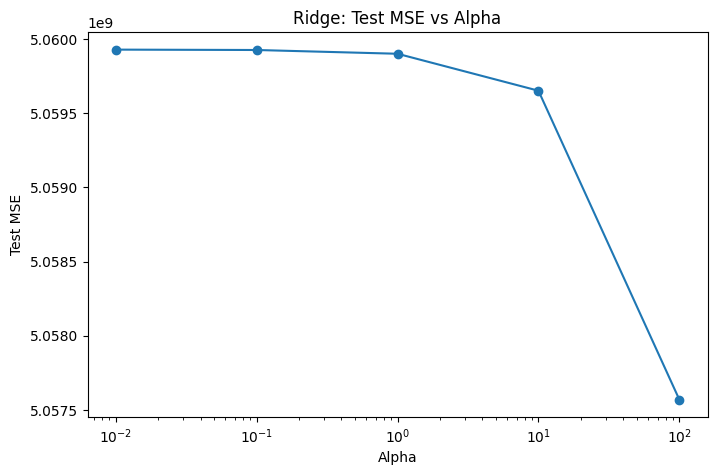

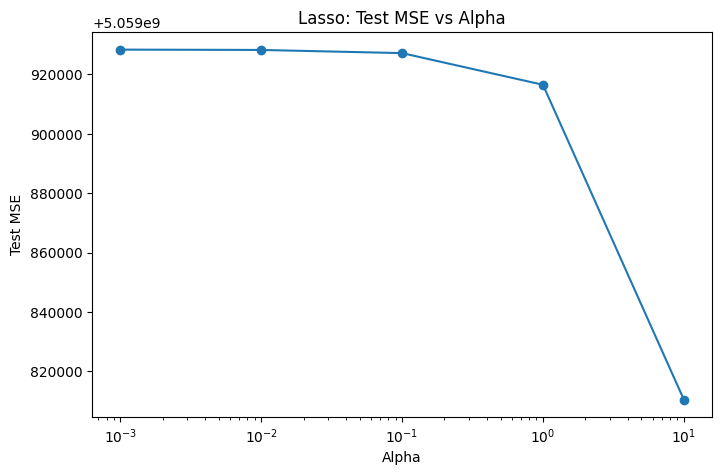

In [38]:
# Ridge MSE vs alpha
alphas_ridge = [0.01, 0.1, 1, 10, 100]
ridge_mse = []

for alpha in alphas_ridge:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    ridge_mse.append(mean_squared_error(y_test, model.predict(X_test)))

plt.figure(figsize=(8,5))
plt.plot(alphas_ridge, ridge_mse, marker='o')
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("Test MSE")
plt.title("Ridge: Test MSE vs Alpha")
plt.show()

# Lasso MSE vs alpha
alphas_lasso = [0.001, 0.01, 0.1, 1, 10]
lasso_mse = []

for alpha in alphas_lasso:
    model = Lasso(alpha=alpha, max_iter=10000)
    model.fit(X_train, y_train)
    lasso_mse.append(mean_squared_error(y_test, model.predict(X_test)))

plt.figure(figsize=(8,5))
plt.plot(alphas_lasso, lasso_mse, marker='o')
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("Test MSE")
plt.title("Lasso: Test MSE vs Alpha")
plt.show()

In [40]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Training samples: 455
Test samples: 114


In [42]:
# Default Logistic Regression (L2 by default)
baseline_logreg = LogisticRegression(max_iter=10000)
baseline_logreg.fit(X_train, y_train)

train_acc = accuracy_score(y_train, baseline_logreg.predict(X_train))
test_acc = accuracy_score(y_test, baseline_logreg.predict(X_test))

print("Baseline Logistic Regression")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("Coefficients:", baseline_logreg.coef_)

Baseline Logistic Regression
Train Accuracy: 0.9582417582417583
Test Accuracy: 0.956140350877193
Coefficients: [[ 1.0274368   0.22145051 -0.36213488  0.0254667  -0.15623532 -0.23771256
  -0.53255786 -0.28369224 -0.22668189 -0.03649446 -0.09710208  1.3705667
  -0.18140942 -0.08719575 -0.02245523  0.04736092 -0.04294784 -0.03240188
  -0.03473732  0.01160522  0.11165329 -0.50887722 -0.01555395 -0.016857
  -0.30773117 -0.77270908 -1.42859535 -0.51092923 -0.74689363 -0.10094404]]


In [43]:
# Define parameter grid
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"]  # liblinear supports both L1 and L2
}

grid_logreg = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, scoring="accuracy")
grid_logreg.fit(X_train, y_train)

best_logreg = grid_logreg.best_estimator_

train_acc = accuracy_score(y_train, best_logreg.predict(X_train))
test_acc = accuracy_score(y_test, best_logreg.predict(X_test))

print("Best Hyperparameters:", grid_logreg.best_params_)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Best Hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Train Accuracy: 0.989010989010989
Test Accuracy: 0.9824561403508771


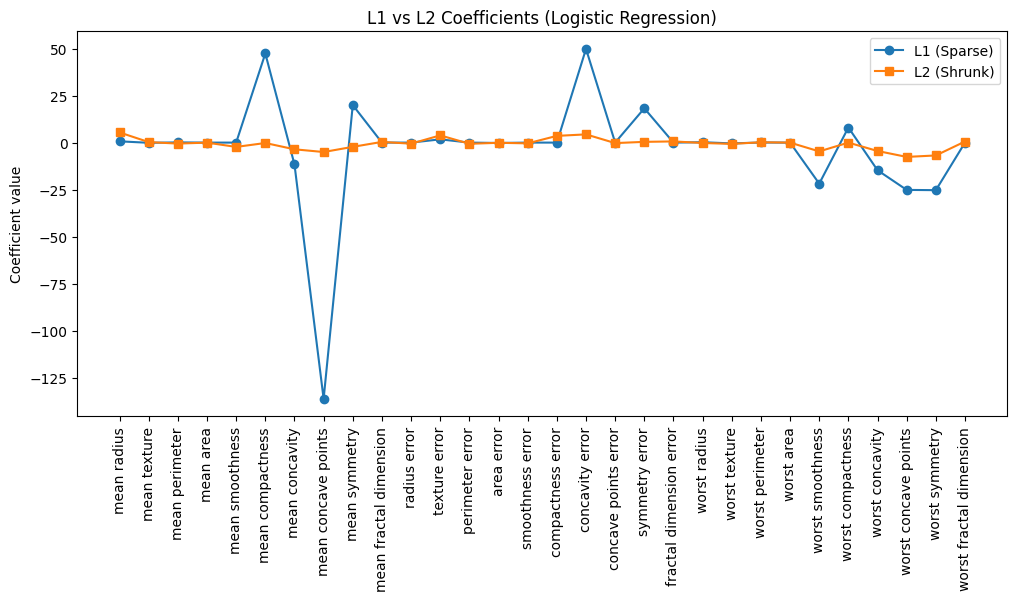

Number of zero coefficients (L1): 9
Number of zero coefficients (L2): 0


In [44]:
import matplotlib.pyplot as plt
import numpy as np

# L1 Logistic Regression
l1_logreg = LogisticRegression(penalty="l1", C=grid_logreg.best_params_['C'], solver="liblinear", max_iter=10000)
l1_logreg.fit(X_train, y_train)

# L2 Logistic Regression
l2_logreg = LogisticRegression(penalty="l2", C=grid_logreg.best_params_['C'], solver="liblinear", max_iter=10000)
l2_logreg.fit(X_train, y_train)

# Plot coefficients
features = load_breast_cancer().feature_names

plt.figure(figsize=(12,5))
plt.plot(features, l1_logreg.coef_[0], 'o-', label="L1 (Sparse)")
plt.plot(features, l2_logreg.coef_[0], 's-', label="L2 (Shrunk)")
plt.xticks(rotation=90)
plt.ylabel("Coefficient value")
plt.title("L1 vs L2 Coefficients (Logistic Regression)")
plt.legend()
plt.show()

print("Number of zero coefficients (L1):", sum(l1_logreg.coef_[0] == 0))
print("Number of zero coefficients (L2):", sum(l2_logreg.coef_[0] == 0))

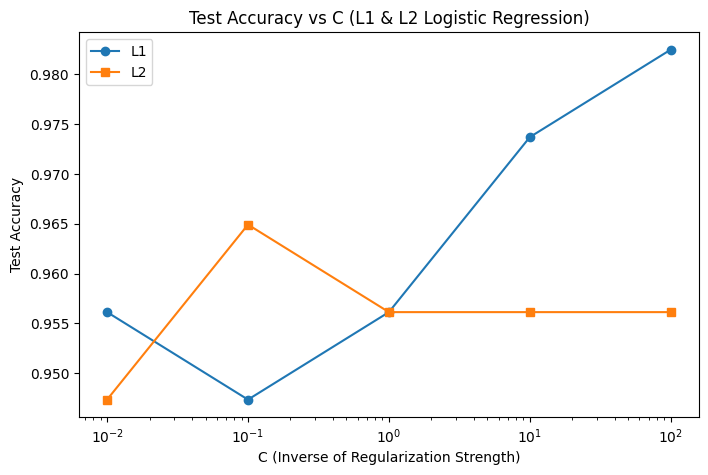

In [45]:
C_values = [0.01, 0.1, 1, 10, 100]
l1_acc = []
l2_acc = []

for C in C_values:
    l1 = LogisticRegression(penalty="l1", C=C, solver="liblinear", max_iter=10000)
    l1.fit(X_train, y_train)
    l1_acc.append(accuracy_score(y_test, l1.predict(X_test)))

    l2 = LogisticRegression(penalty="l2", C=C, solver="liblinear", max_iter=10000)
    l2.fit(X_train, y_train)
    l2_acc.append(accuracy_score(y_test, l2.predict(X_test)))

plt.figure(figsize=(8,5))
plt.plot(C_values, l1_acc, marker='o', label="L1")
plt.plot(C_values, l2_acc, marker='s', label="L2")
plt.xscale('log')
plt.xlabel("C (Inverse of Regularization Strength)")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs C (L1 & L2 Logistic Regression)")
plt.legend()
plt.show()